### Playing around, this is not a final version. My aim is to use an ML model to identify features of importance for attrition

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session|

/kaggle/input/employee/train.csv
/kaggle/input/employee/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

In [3]:
df = pd.read_csv('/kaggle/input/employee/train.csv')

In [4]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
print(df.duplicated().sum())

0


In [9]:
# df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], inplace=True)

In [10]:
# df = pd.get_dummies(df, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [11]:
#scaler = StandardScaler()
#df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = scaler.fit_transform(df[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])

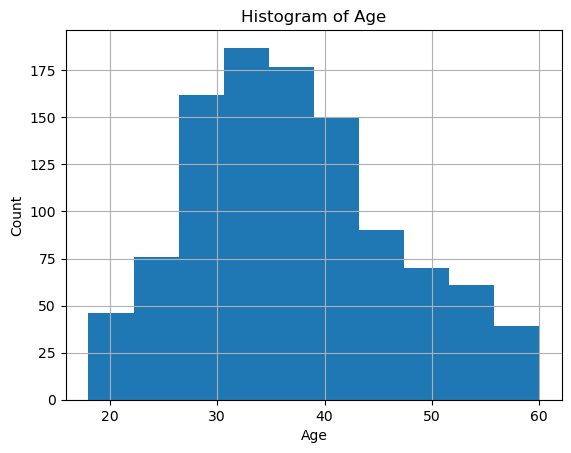

In [12]:
# Histogram of Age
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

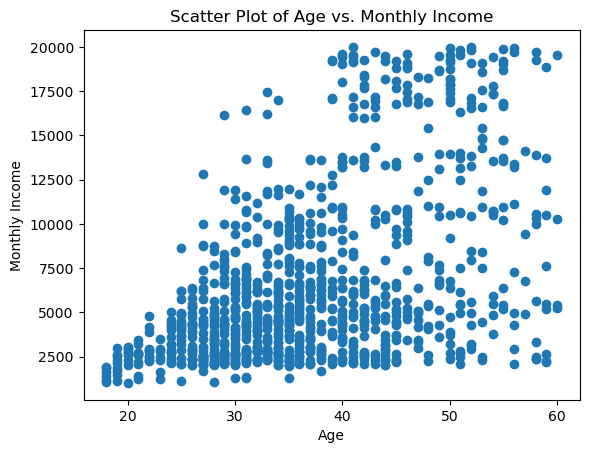

In [13]:
# Scatter plot of Age vs. MonthlyIncome
plt.scatter(df['Age'], df['MonthlyIncome'])
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.title('Scatter Plot of Age vs. Monthly Income')
plt.show()

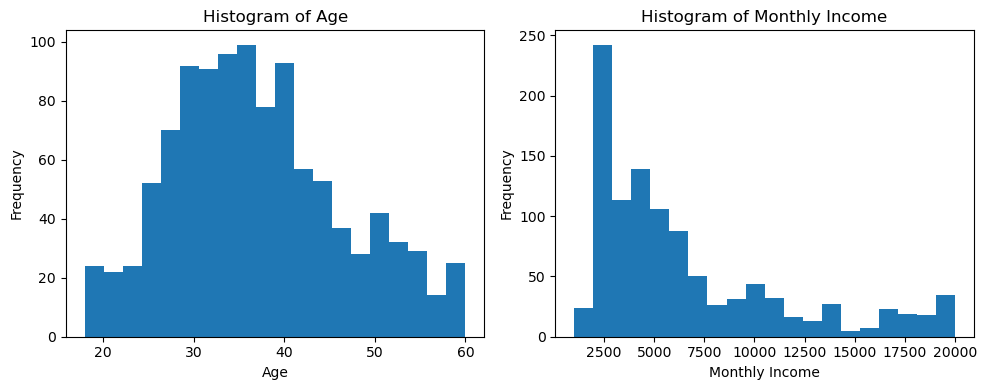

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
df['Age'].plot(kind='hist', bins=20)
plt.xlabel('Age')
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
df['MonthlyIncome'].plot(kind='hist', bins=20)
plt.xlabel('Monthly Income')
plt.title('Histogram of Monthly Income')

plt.tight_layout()
plt.show()

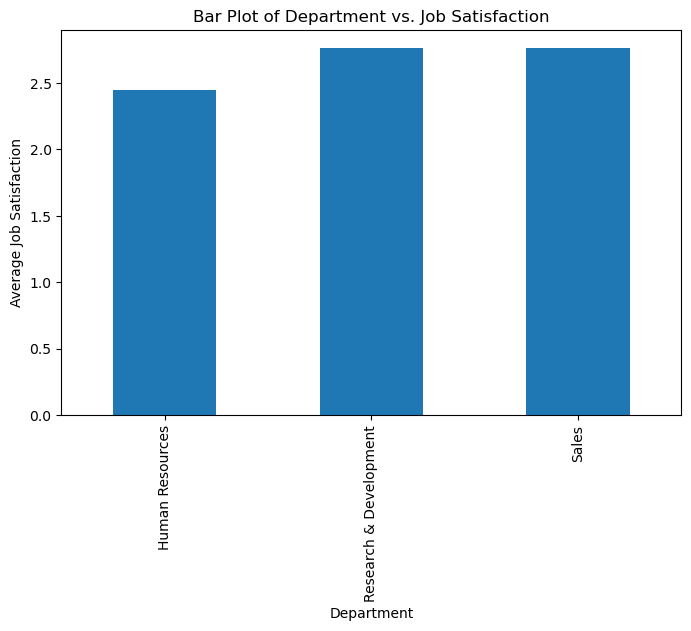

In [15]:
# Plot bar plot of Department vs. Job Satisfaction
plt.figure(figsize=(8,5))
df.groupby('Department')['JobSatisfaction'].mean().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Average Job Satisfaction')
plt.title('Bar Plot of Department vs. Job Satisfaction')
plt.show()

<Figure size 800x500 with 0 Axes>

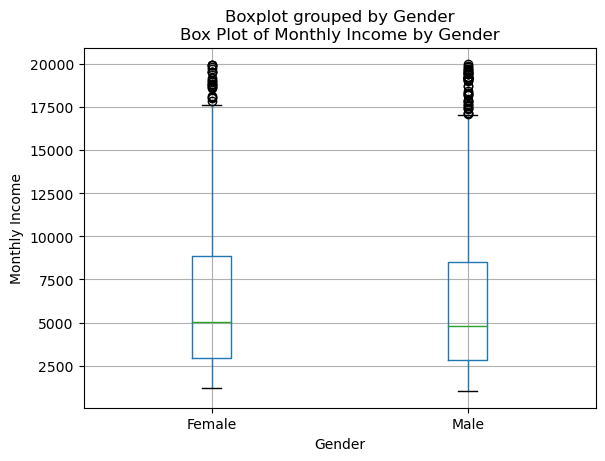

In [16]:
# Plot box plot of Monthly Income by Gender
plt.figure(figsize=(8,5))
df.boxplot(column='MonthlyIncome', by='Gender')
plt.xlabel('Gender')
plt.ylabel('Monthly Income')
plt.title('Box Plot of Monthly Income by Gender')
plt.show()

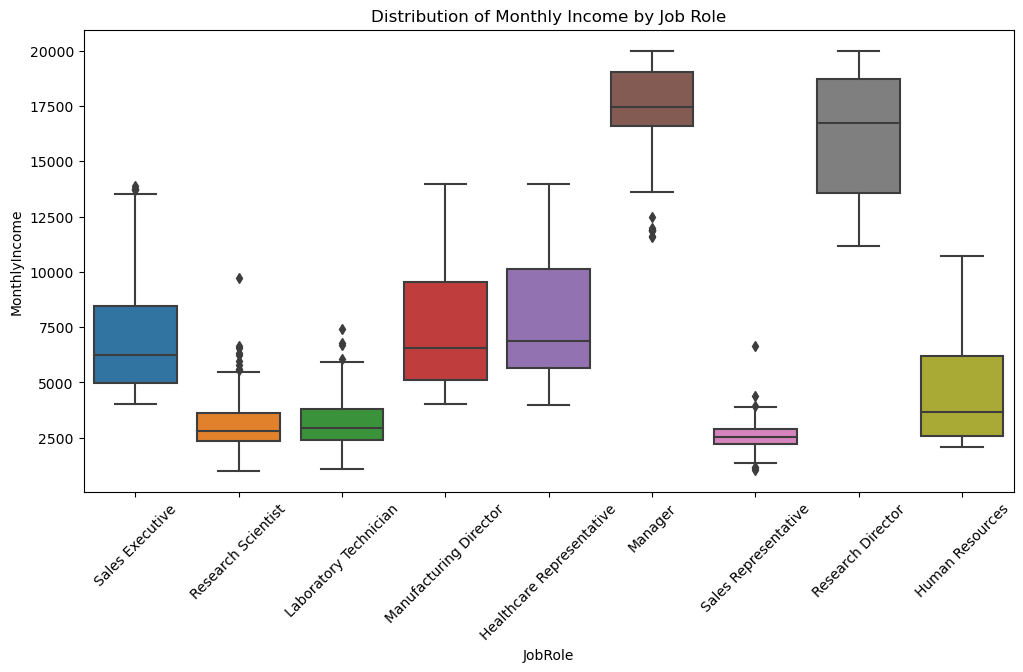

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome')
plt.title('Distribution of Monthly Income by Job Role')
plt.xticks(rotation=45)
plt.show()

The average income is: $6,625.95


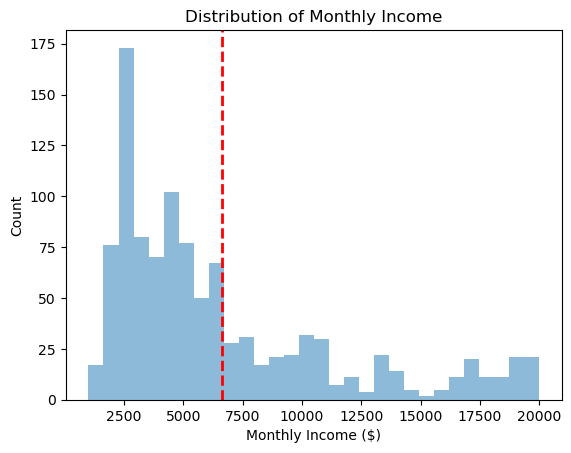

In [18]:
# Calculate average income
avg_income = df['MonthlyIncome'].mean()

# Print average income
print("The average income is: ${:,.2f}".format(avg_income))

# Plot histogram of MonthlyIncome
plt.hist(df['MonthlyIncome'], bins=30, alpha=0.5)
plt.axvline(avg_income, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Monthly Income ($)')
plt.ylabel('Count')
plt.title('Distribution of Monthly Income')
plt.show()

In [19]:
# Calculate the average salary
avg_salary = df['MonthlyIncome'].mean()

# Subset the dataframe to include only employees earning above the average salary
above_avg_salary = df[df['MonthlyIncome'] > avg_salary]

# Calculate the average years of experience for these employees
avg_experience_above_avg_salary = above_avg_salary['TotalWorkingYears'].mean()

print(f"The average years of experience for employees earning above the average salary is: {avg_experience_above_avg_salary}")

The average years of experience for employees earning above the average salary is: 18.570224719101123


In [20]:
average_salary = df['MonthlyIncome'].mean()
print(f"Average salary: {average_salary}")

Average salary: 6625.945179584121


## Lets try a random forest classifier and see what weights mean the most
##### Ideally we need to remove some feaures, but I will do this later on after initial exploring

In [21]:
# Drop irrelevant features
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [22]:
# Separate the target variable
target = df['MonthlyIncome']
features = df.drop('MonthlyIncome', axis=1)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Preprocess the features
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                      'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
                      'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [24]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

# Train a random forest classifier
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('selector', SelectFromModel(RandomForestClassifier(random_state=42))),
                      ('classifier', RandomForestClassifier(random_state=42))])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'RelationshipSatisfaction',
                              

Text(0, 0.5, 'Feature')

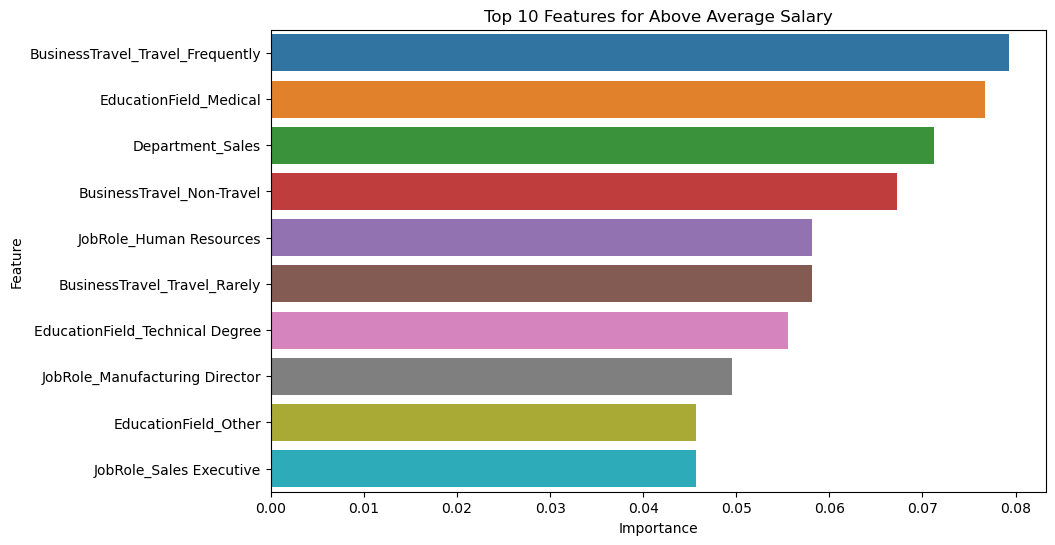

In [25]:
# Extract the important features
important_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist() + numerical_features
important_features = [important_features[i] for i in clf.named_steps['selector'].get_support(indices=True)]

# Plot the top 10 important features
feat_importances_df = pd.DataFrame({'Feature': important_features, 'Importance': clf.named_steps['classifier'].feature_importances_})
feat_importances_df = feat_importances_df.sort_values('Importance', ascending=False).reset_index(drop=True)
top_10_features = feat_importances_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features)
plt.title('Top 10 Features for Above Average Salary')
plt.xlabel('Importance')
plt.ylabel('Feature')

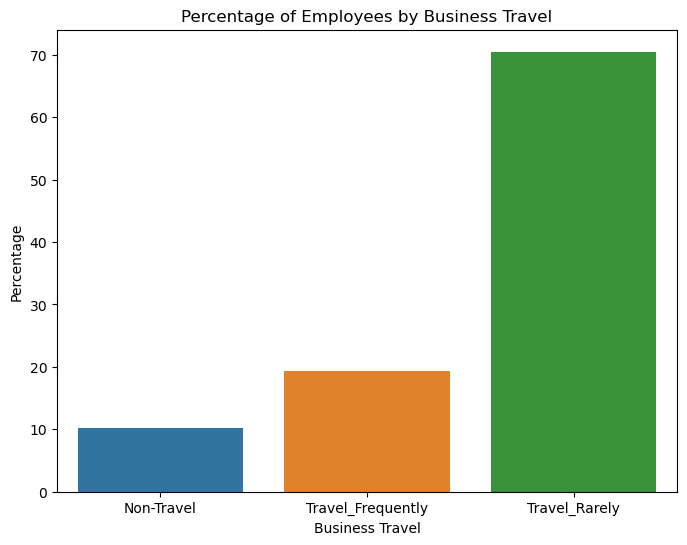

In [26]:
# Calculate the percentage of employees that travel frequently and not at all
df_travel = df.groupby('BusinessTravel').size().reset_index(name='counts')
df_travel['percentage'] = df_travel['counts'] / df_travel['counts'].sum() * 100

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='BusinessTravel', y='percentage', data=df_travel)
plt.title('Percentage of Employees by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Percentage')
plt.show()

In [27]:
# Calculate percentage of employees who are Research Directors
num_rd = len(df[df['JobRole'] == 'Research Director'])
total_employees = len(df)
percent_rd = num_rd / total_employees * 100

print(f"Percentage of employees who are Research Directors: {percent_rd:.2f}%")

Percentage of employees who are Research Directors: 5.86%


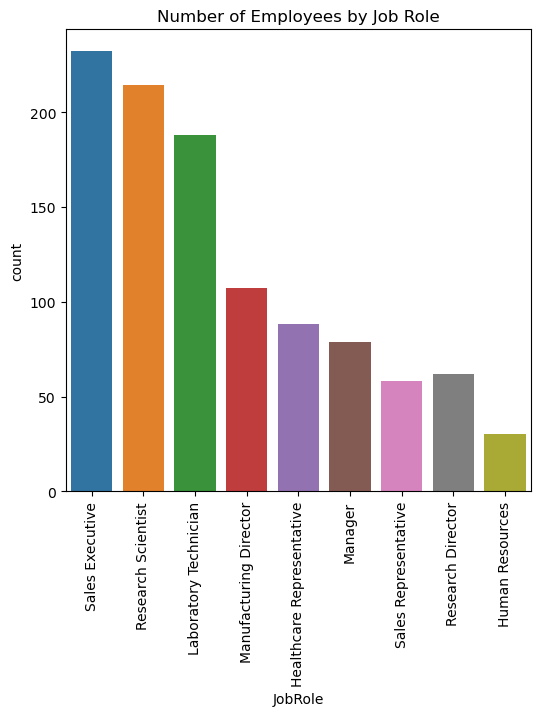

In [28]:
# Visualize percentage of employees who are Research Directors
plt.figure(figsize=(6, 6))
sns.countplot(x='JobRole', data=df)
plt.title('Number of Employees by Job Role')
plt.xticks(rotation=90)
plt.show()

In [29]:
avg_years_before_promotion = df['YearsSinceLastPromotion'].mean()
print(f"Average years before promotion: {avg_years_before_promotion:.2f}")

Average years before promotion: 2.20


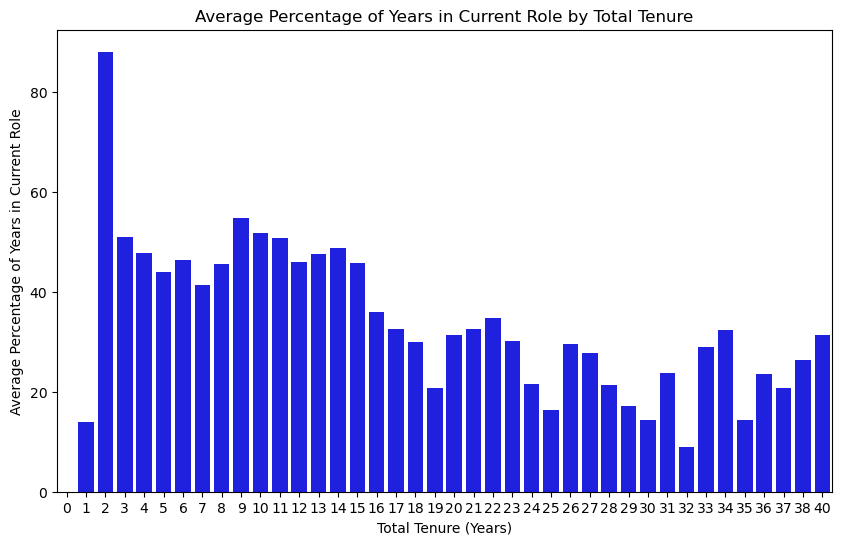

In [30]:
# Calculate the average percentage of years in current role
avg_years_pct = (df.groupby('TotalWorkingYears')['YearsInCurrentRole'].mean() / df.groupby('TotalWorkingYears')['TotalWorkingYears'].mean()) * 100

# Create a bar plot of the average percentage of years in current role
plt.figure(figsize=(10,6))
sns.barplot(x=avg_years_pct.index, y=avg_years_pct.values, color='blue')
plt.title('Average Percentage of Years in Current Role by Total Tenure')
plt.xlabel('Total Tenure (Years)')
plt.ylabel('Average Percentage of Years in Current Role')
plt.show()

In [31]:
# Calculate the number of employees with each performance rating
performance_count = df['PerformanceRating'].value_counts()

# Calculate the percentage of employees with each performance rating
performance_pct = performance_count / df.shape[0] * 100

# Print the results
print(performance_pct)

3    84.971645
4    15.028355
Name: PerformanceRating, dtype: float64


In [32]:
# Create a bar chart of the percentage of employees in each PerformanceRating category
plt.figure(figsize=(8, 6))
sns.barplot(x=performance_counts.index, y=performance_counts.values)
plt.title('Percentage of Employees in Each PerformanceRating Category')
plt.xlabel('PerformanceRating')
plt.ylabel('Percentage of Employees')
plt.show()

NameError: name 'performance_counts' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
# Convert Attrition column to binary values (0 or 1)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.2, random_state=42)

In [ ]:
# Define the preprocessing steps for the pipeline
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object))
    ])

In [ ]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)